1. Lib Yang Saya Gunakan    

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle

2. Memasukan Datasheet dengan pandas

In [118]:
stunting_data = pd.read_excel('data-stunting.xlsx')
stunting_data


No                 NIK                      Nama  JK    Tgl Lahir  \
0    NaN  3603180503210003                SAHRUL ULUM   L   2021-03-05    
1    NaN  3603185104210001                     GENDIS   P   2021-04-11    
2    NaN  3603185711200004               SITI ZAKIYAH   P   2020-11-17    
3    NaN  3603181803210004             KANIA OTAVIANI   P   2021-10-26    
4    NaN  3603184606210004                      KAIFA   L   2021-06-04    
...   ..                 ...                       ...  ..          ...   
4834 NaN  3603182212220001               KENZYO BRYAN   L   2022-12-22    
4835 NaN  3603300702232314     MUHAMMAD FADLAN ABIDIN   L   2023-02-07    
4836 NaN  3603301202234869    MUHAMMAD BILAL SYAPUTRA   L   2023-02-12    
4837 NaN  3603181304230001    MUHAMMAD ALVAN ADITHAMA   L   2023-04-13    
4838 NaN  3603301205233394            M. AFDAL NAFEES   L   2023-05-12    

     BB Lahir TB Lahir               Nama Ortu     Prov    Kab/Kota  ...  \
0        3.1       47          AHMAD SAEPUDIN   BANTEN   TANGERANG   ...   
1        3.3       47                   RONAL   BANTEN   TANGERANG   ...   
2        3.3       50           JENUS SOLIHIN   BANTEN   TANGERANG   ...   
3        2.8       47   RIAN. H. / NURHAYANI    BANTEN   TANGERANG   ...   
4          3     50.1       AHMAD RIFAI/ADE.F   BANTEN   TANGERANG   ...   
...       ...      ...                     ...      ...         ...  ...   
4834     3.3       50         BERLYAN SAPUTRA   BANTEN   TANGERANG   ...   
4835     4.9       50        mukti wilanggeng   BANTEN   TANGERANG   ...   
4836     3.2     50.1        DEDE ILHAM FAUZI   BANTEN   TANGERANG   ...   
4837     2.9       50                 budiman   BANTEN   TANGERANG   ...   
4838       3       49                  SUMADI   BANTEN   TANGERANG   ...   

            BB/TB ZS BB/TB Naik Berat Badan PMT Diterima (kg) Jml Vit A KPSP  \
0     Gizi Kurang    -2.91                O                 -       1.0   -    
1       Gizi Baik    -1.60                N                 -       1.0   -    
2       Gizi Baik    -1.37                N                 -       1.0   -    
3       Gizi Baik    -1.61                O                 -       1.0   -    
4       Gizi Baik    -1.33                N                 -       1.0   -    
...           ...      ...              ...               ...       ...  ...   
4834    Gizi Baik    -1.78                T                 -       1.0   -    
4835    Gizi Baik    -1.02                T                 -       1.0   -    
4836    Gizi Baik    -0.81                T                 -       1.0   -    
4837    Gizi Baik     0.18                T                 -       1.0   -    
4838    Gizi Baik     0.61                N                 -       1.0   -    

     KIA KASUS UNDERWEIGHT BARU KASUS STUNTING BARU  KASUS WASTING BARU  
0     -                    BARU                  -                   -   
1     -                    BARU                  -                   -   
2     -                    BARU                  -                   -   
3     -                    BARU                  -                   -   
4     -                    BARU                  -                   -   
...   ..                    ...                 ...                 ...  
4834  -                     NaN                 NaN                 NaN  
4835  -                     NaN                 NaN                 NaN  
4836  -                     NaN                 NaN                 NaN  
4837  -                     NaN                 NaN                 NaN  
4838  -                     NaN                 NaN                 NaN  

[4839 rows x 36 columns]

In [119]:
#cek value pada atribut target
stunting_data['BB/TB'].value_counts()

BB/TB
Gizi Baik            4429
Gizi Kurang           166
Risiko Gizi Lebih     122
Gizi Lebih             48
Obesitas               27
Gizi Buruk             22
Name: count, dtype: int64

In [120]:

# Misalkan stunting_data adalah DataFrame Anda
# Pilih hanya kolom 'BB/TB'
bb_tb_column = stunting_data['BB/TB']

# Hapus missing values dari kolom 'BB/TB'
bb_tb_cleaned = bb_tb_column.dropna()

# Menampilkan jumlah nilai setelah menghapus missing values
print(f"Jumlah nilai setelah menghapus missing values: {len(bb_tb_cleaned)}")

# Menampilkan nilai unik setelah membersihkan missing values
print(f"Nilai unik setelah membersihkan missing values:\n{bb_tb_cleaned.value_counts()}")

Jumlah nilai setelah menghapus missing values: 4814
Nilai unik setelah membersihkan missing values:
BB/TB
Gizi Baik            4429
Gizi Kurang           166
Risiko Gizi Lebih     122
Gizi Lebih             48
Obesitas               27
Gizi Buruk             22
Name: count, dtype: int64


In [121]:
# Get Location Index data
def get_index(element):
    return stunting_data.columns.get_loc(element)

In [122]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Misalkan stunting_data adalah DataFrame Anda

# Memilih fitur yang ingin diproses
feature = stunting_data.iloc[:, [get_index("Berat"), get_index("Tinggi"), get_index("BB/U"), get_index("TB/U"), get_index("BB/TB"), get_index("JK")]] 

# Menghapus baris dengan nilai kosong atau null
feature = feature.dropna()

# Mentransformasikan kolom-kolom yang diperlukan
label_encoder = LabelEncoder()

feature["JK"] = label_encoder.fit_transform(feature["JK"].astype("str"))
feature["BB/U"] = label_encoder.fit_transform(feature["BB/U"].astype("str"))
feature["TB/U"] = label_encoder.fit_transform(feature["TB/U"].astype("str"))
feature["BB/TB"] = label_encoder.fit_transform(feature["BB/TB"].astype("str"))

# Menampilkan informasi data
print(feature.head())
print(feature.info())



   Berat  Tinggi  BB/U  TB/U  BB/TB  JK
0    9.7    87.0     3     1      2   0
1   10.2    86.3     1     0      0   1
2   11.0    89.0     1     0      0   1
3    9.4    82.6     1     0      0   1
4    9.8    81.7     1     2      0   0
<class 'pandas.core.frame.DataFrame'>
Index: 4808 entries, 0 to 4838
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Berat   4808 non-null   float64
 1   Tinggi  4808 non-null   float64
 2   BB/U    4808 non-null   int32  
 3   TB/U    4808 non-null   int32  
 4   BB/TB   4808 non-null   int32  
 5   JK      4808 non-null   int32  
dtypes: float64(2), int32(4)
memory usage: 187.8 KB
None


BB/TB
Gizi Baik            4429
Gizi Kurang           166
Risiko Gizi Lebih     122
Gizi Lebih             48
Obesitas               27
Gizi Buruk             22
0    4429
2     166
5     122
3      48
4      27
6      25
1      22

In [123]:
label_encoder = LabelEncoder()
feature["BB/TB"] = label_encoder.fit_transform(feature["BB/TB"])

# Menampilkan ringkasan nilai kategorikal
print("Ringkasan nilai kategorikal:")
print(feature["BB/TB"].value_counts())

Ringkasan nilai kategorikal:
BB/TB
0    4425
2     165
5     122
3      48
4      26
1      22
Name: count, dtype: int64


BB/TB
Gizi Baik            4429
Gizi Kurang           166
Risiko Gizi Lebih     122
Gizi Lebih             48
Obesitas               27
Gizi Buruk             22
Ringkasan nilai kategorikal:
BB/TB
0    4425
2     165
5     122
3      48
4      26
1      22
Name: count, dtype: int64

In [124]:
np.sum(pd.isnull(feature).sum()) # Sum of the count of null objects in all columns of data frame

0

In [125]:
print(feature.isnull().sum())

Berat     0
Tinggi    0
BB/U      0
TB/U      0
BB/TB     0
JK        0
dtype: int64


In [126]:
feature.describe()

Berat       Tinggi         BB/U         TB/U        BB/TB  \
count  4808.000000  4808.000000  4808.000000  4808.000000  4808.000000   
mean     12.614848    91.742159     0.135607     0.085067     0.251664   
std       2.756676    11.431809     0.462351     0.379473     0.943096   
min       2.800000    49.000000     0.000000     0.000000     0.000000   
25%      10.800000    84.500000     0.000000     0.000000     0.000000   
50%      13.100000    95.000000     0.000000     0.000000     0.000000   
75%      14.500000   101.000000     0.000000     0.000000     0.000000   
max      30.000000   119.000000     3.000000     3.000000     5.000000   

                JK  
count  4808.000000  
mean      0.445507  
std       0.497073  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [127]:
print(feature.isnull().sum())

Berat     0
Tinggi    0
BB/U      0
TB/U      0
BB/TB     0
JK        0
dtype: int64


In [128]:
label = feature["BB/TB"]
feature_1 = feature.drop(columns=['BB/TB'])
feature_1.head()

Berat  Tinggi  BB/U  TB/U  JK
0    9.7    87.0     3     1   0
1   10.2    86.3     1     0   1
2   11.0    89.0     1     0   1
3    9.4    82.6     1     0   1
4    9.8    81.7     1     2   0

In [129]:
label = feature["BB/TB"]
value_counts = label.value_counts()
print(value_counts)


BB/TB
0    4425
2     165
5     122
3      48
4      26
1      22
Name: count, dtype: int64


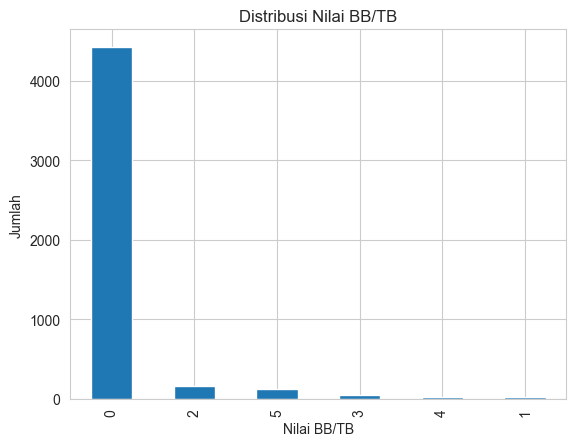

In [130]:
import matplotlib.pyplot as plt

label.value_counts().plot(kind='bar')
plt.title('Distribusi Nilai BB/TB')
plt.xlabel('Nilai BB/TB')
plt.ylabel('Jumlah')
plt.show()


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_norm = scaler.fit_transform(feature_1)
feature_norm = pd.DataFrame(feature_norm, columns=feature_1.columns)
feature_norm

Berat    Tinggi      BB/U      TB/U   JK
0     0.253676  0.542857  1.000000  0.333333  0.0
1     0.272059  0.532857  0.333333  0.000000  1.0
2     0.301471  0.571429  0.333333  0.000000  1.0
3     0.242647  0.480000  0.333333  0.000000  1.0
4     0.257353  0.467143  0.333333  0.666667  0.0
...        ...       ...       ...       ...  ...
4803  0.205882  0.385714  0.000000  0.000000  0.0
4804  0.209559  0.352857  0.000000  0.000000  0.0
4805  0.216912  0.357143  0.000000  0.000000  0.0
4806  0.227941  0.328571  0.000000  0.000000  0.0
4807  0.264706  0.371429  0.666667  0.000000  0.0

[4808 rows x 5 columns]

In [132]:
# Periksa kolom dalam dataframe
print(feature_norm.columns)


Index(['Berat', 'Tinggi', 'BB/U', 'TB/U', 'JK'], dtype='object')


In [133]:
feature_norm["BB/TB"] = label
feature_norm

Berat    Tinggi      BB/U      TB/U   JK  BB/TB
0     0.253676  0.542857  1.000000  0.333333  0.0    2.0
1     0.272059  0.532857  0.333333  0.000000  1.0    0.0
2     0.301471  0.571429  0.333333  0.000000  1.0    0.0
3     0.242647  0.480000  0.333333  0.000000  1.0    0.0
4     0.257353  0.467143  0.333333  0.666667  0.0    0.0
...        ...       ...       ...       ...  ...    ...
4803  0.205882  0.385714  0.000000  0.000000  0.0    0.0
4804  0.209559  0.352857  0.000000  0.000000  0.0    0.0
4805  0.216912  0.357143  0.000000  0.000000  0.0    0.0
4806  0.227941  0.328571  0.000000  0.000000  0.0    0.0
4807  0.264706  0.371429  0.666667  0.000000  0.0    0.0

[4808 rows x 6 columns]

C:\Users\User\AppData\Local\Temp\ipykernel_13048\2779333750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature_norm['BB/TB'],data=feature_norm,palette='RdBu_r')


<Axes: xlabel='BB/TB', ylabel='count'>

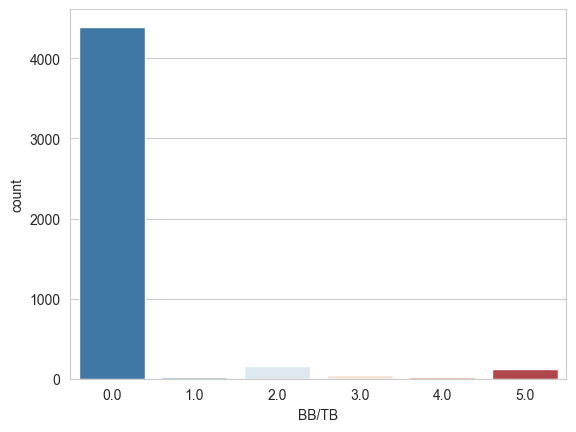

In [134]:
sns.set_style('whitegrid')
sns.countplot(x=feature_norm['BB/TB'],data=feature_norm,palette='RdBu_r')

In [135]:
feature_norm = feature_norm.dropna(subset=['BB/TB'])

In [136]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Definisikan objek SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE
X_resampled, y_resampled = smote.fit_resample(
    feature_norm.drop(columns=['BB/TB']),
    feature_norm['BB/TB']
)

print("Jumlah sampel per kelas setelah SMOTE:", Counter(y_resampled))


Jumlah sampel per kelas setelah SMOTE: Counter({2.0: 4395, 0.0: 4395, 1.0: 4395, 5.0: 4395, 4.0: 4395, 3.0: 4395})


C:\Users\User\AppData\Local\Temp\ipykernel_13048\3594647708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled,data=X_resampled,palette='RdBu_r')


<Axes: xlabel='BB/TB', ylabel='count'>

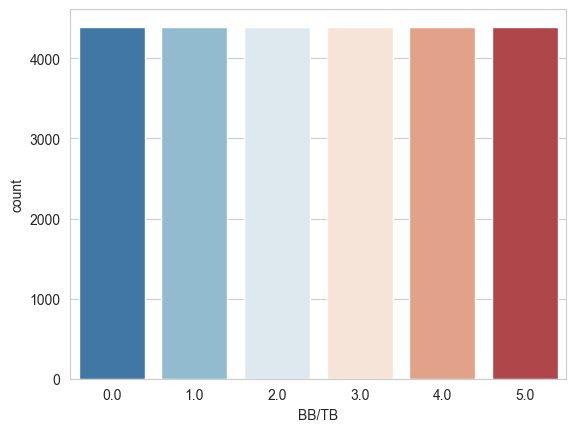

In [137]:
sns.set_style('whitegrid')
sns.countplot(x=y_resampled,data=X_resampled,palette='RdBu_r')

C:\Users\User\AppData\Local\Temp\ipykernel_13048\277686819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BB/TB',y=l[i], data=feature, palette='winter')
C:\Users\User\AppData\Local\Temp\ipykernel_13048\277686819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BB/TB',y=l[i], data=feature, palette='winter')
C:\Users\User\AppData\Local\Temp\ipykernel_13048\277686819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BB/TB',y=l[i], data=feature, palette='winter')
C:\Users\User\AppData\Local\Temp\ipykernel_13048\277686819.py:3:

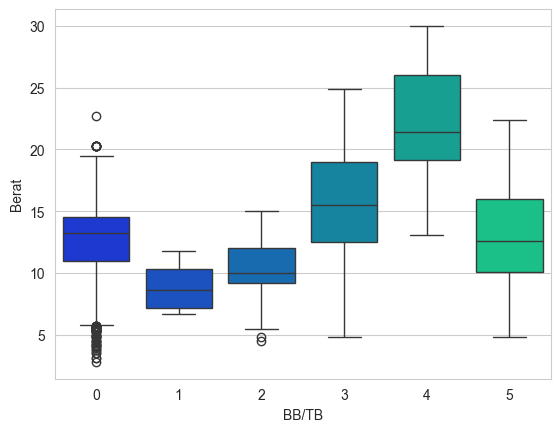

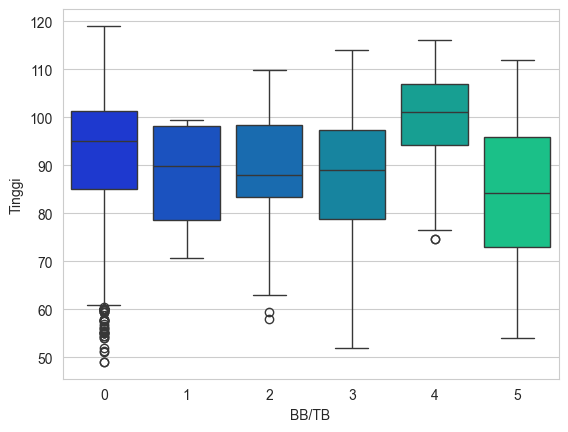

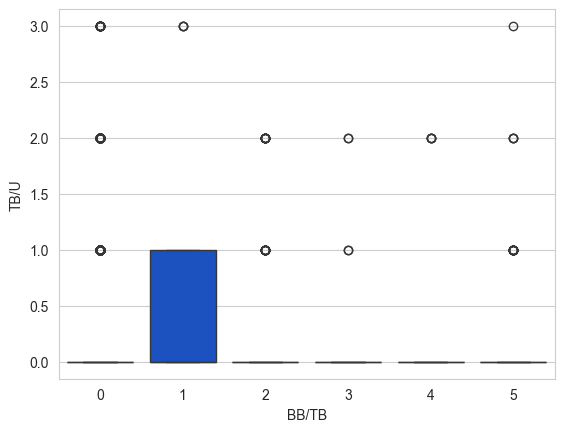

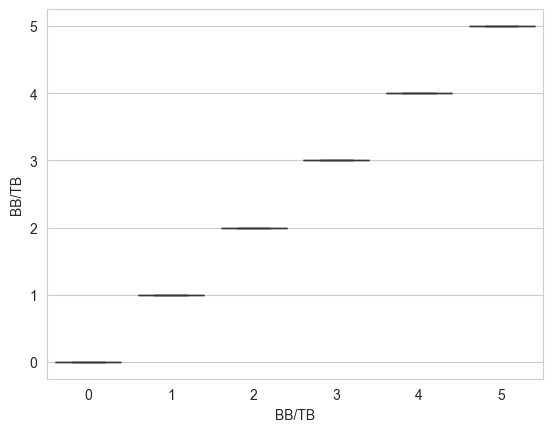

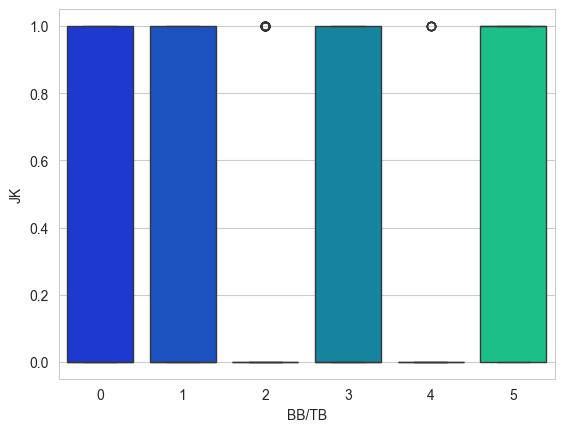

<Figure size 640x480 with 0 Axes>

In [138]:
l=list(feature.columns[0:10])
for i in range(len(l)):
    sns.boxplot(x='BB/TB',y=l[i], data=feature, palette='winter')
    plt.figure()

distribusi variabel numerik (y) dalam hubungannya dengan variabel kategori (x) yang ditentukan oleh kolom 'BB/TB' dalam DataFrame feature.

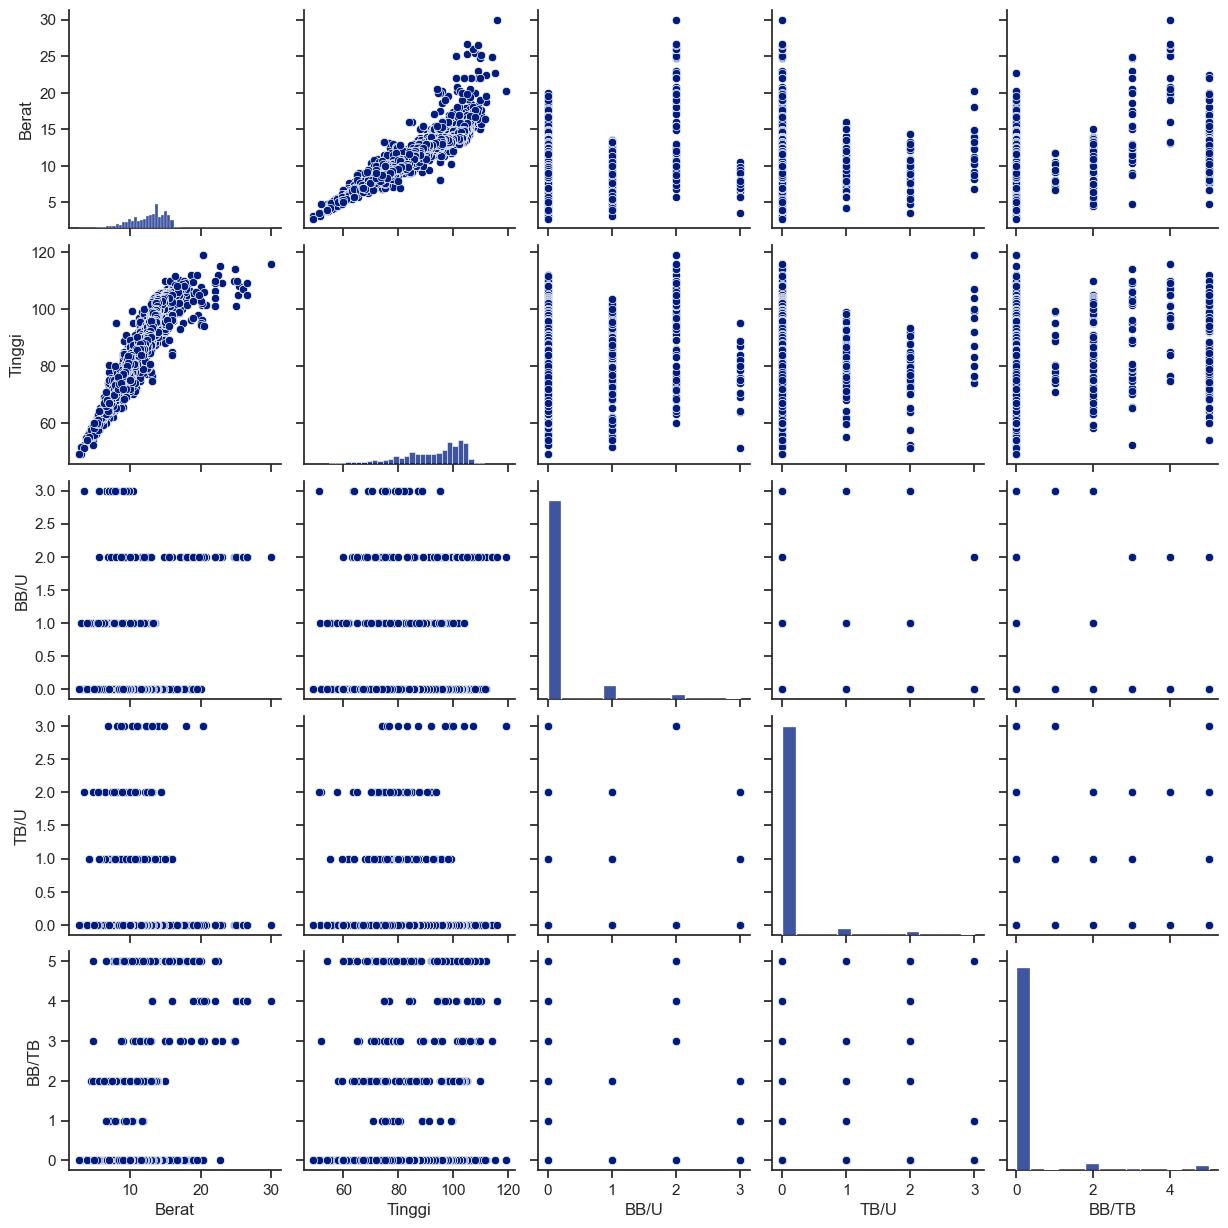

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.set_palette("dark") 

sns.pairplot(feature, vars=['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/TB'])

plt.show()


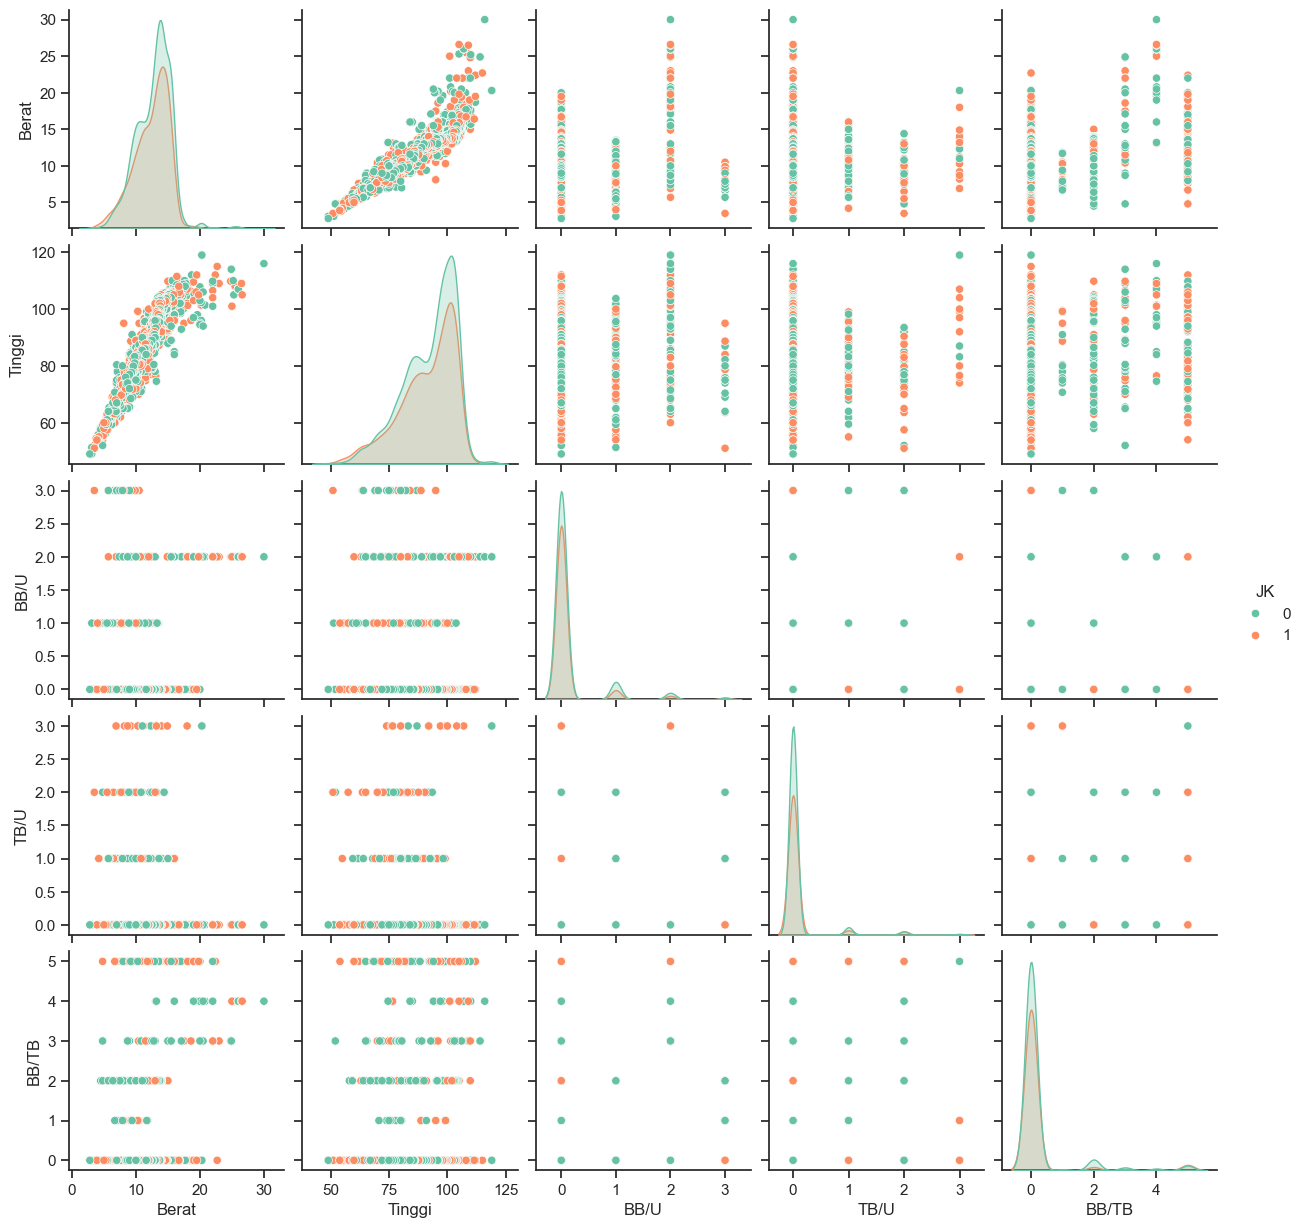

In [140]:
sns.pairplot(feature, hue='JK', vars=['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/TB'], palette='Set2')


In [143]:
print(X_resampled.columns)


Index(['Berat', 'Tinggi', 'BB/U', 'TB/U', 'JK'], dtype='object')


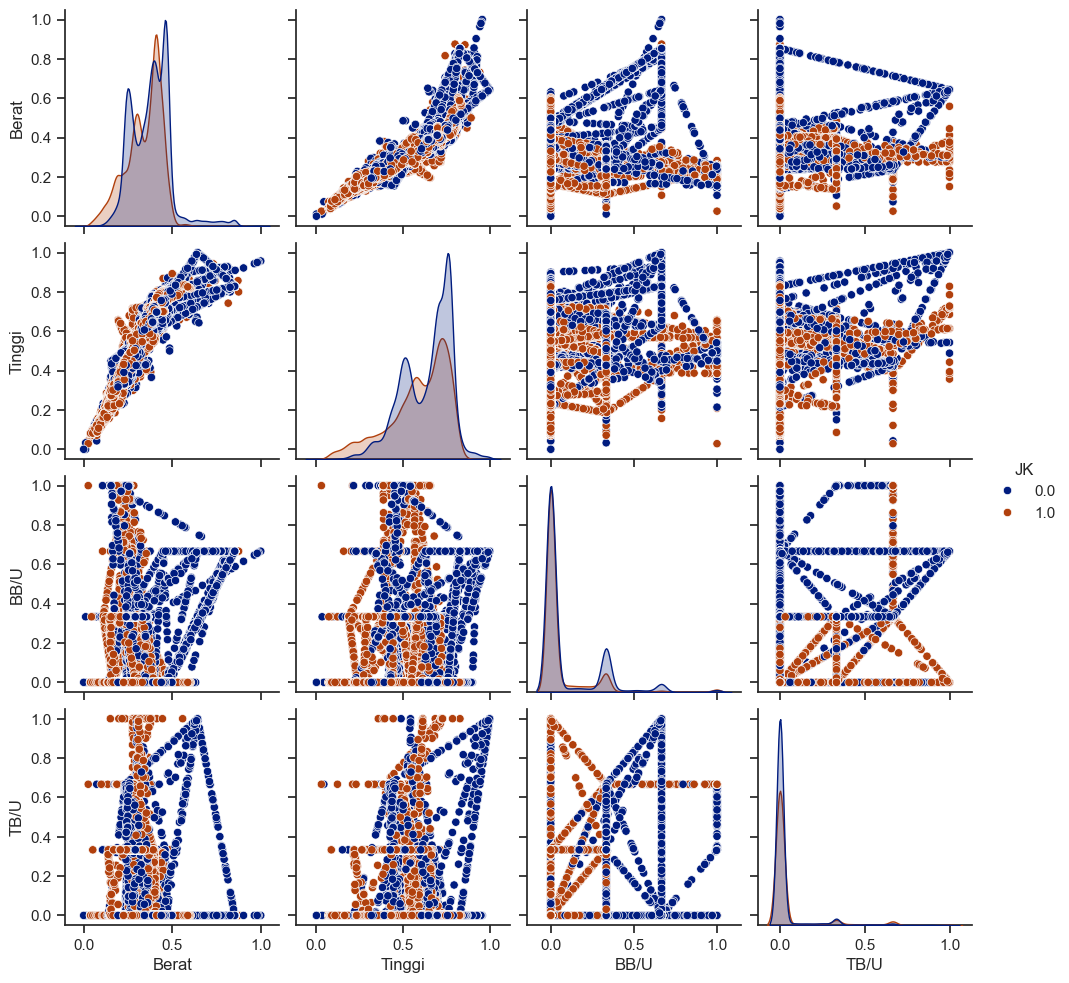

In [144]:
sns.pairplot(X_resampled, hue='JK', vars=['Berat', 'Tinggi', 'BB/U', 'TB/U'])
plt.show()



X_resampled: Dataset yang sudah dire-sampling (misalnya, menggunakan SMOTE) yang berisi fitur-fitur yang ingin kita bandingkan.
hue='BB/TB': Parameter ini memberikan warna pada pairplot berdasarkan kategori dalam kolom 'BB/TB'. Setiap kategori akan ditandai dengan warna yang berbeda.
vars=['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/TB']: Daftar variabel yang akan dibandingkan secara berpasangan untuk membuat pairplot.


In [145]:
plt.figure(figsize=(20,12))
sns.heatmap(feature.corr(), annot=True)

<Axes: >

<Axes: >

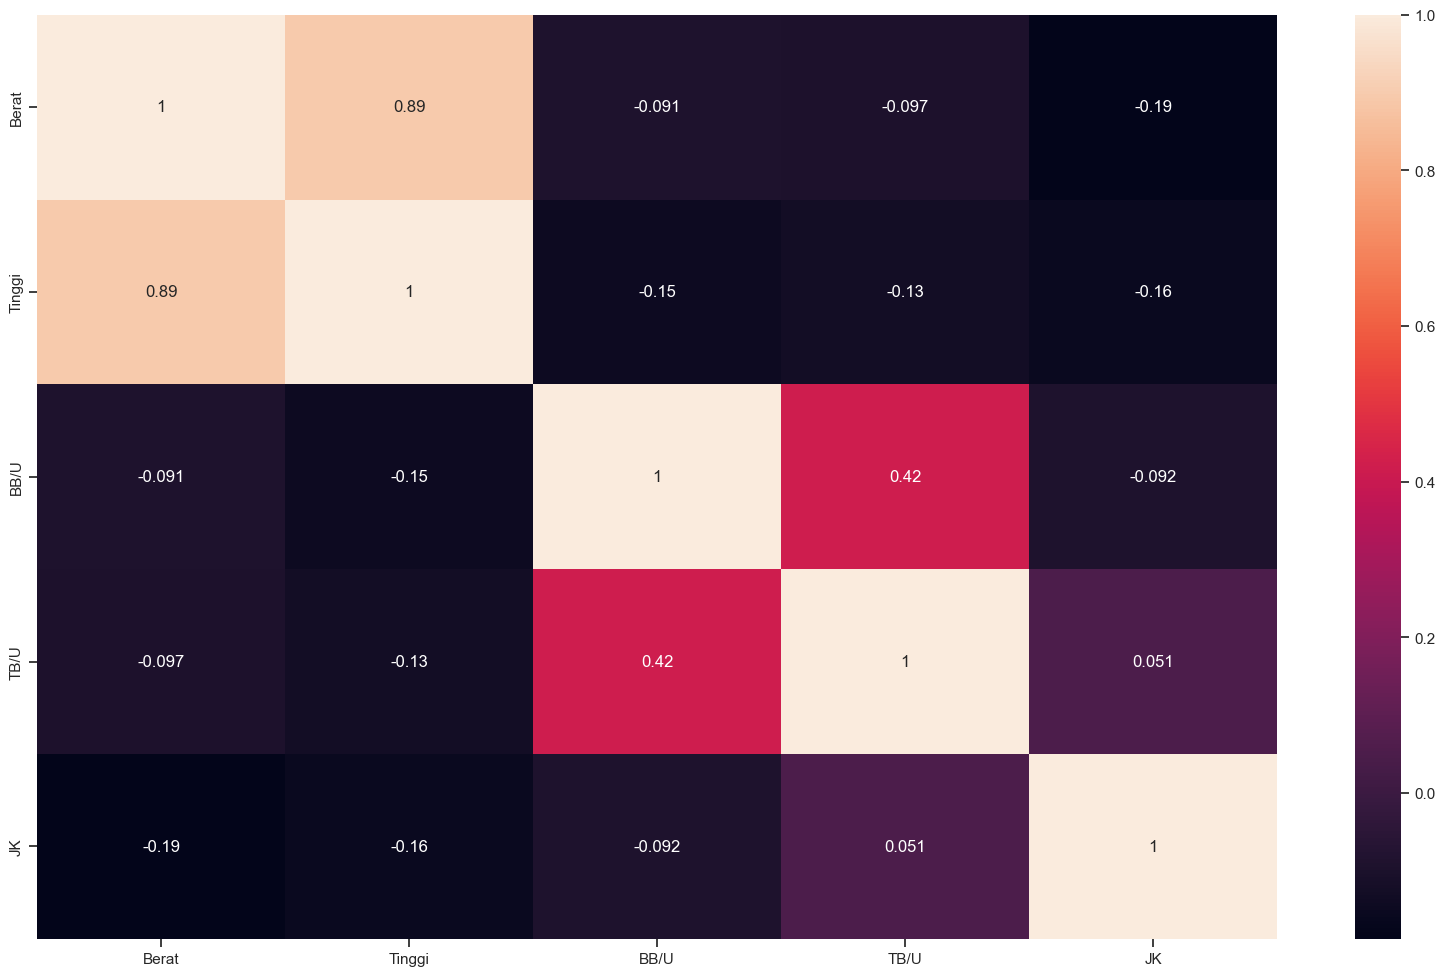

In [146]:
plt.figure(figsize=(20,12))
sns.heatmap(X_resampled.corr(), annot=True)

Train Model

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import pandas as pd

# Misalnya, Anda memiliki data dalam DataFrame 'feature' dan 'target'

# Definisikan X dan y
X = feature[['Berat', 'Tinggi', 'BB/U', 'TB/U', 'JK']]
y = feature['BB/TB']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Model Linear Regression (Contoh untuk ilustrasi)
print("Training Linear Regression...")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluasi Linear Regression
print("Evaluasi Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

# 2. Model Naive Bayes
print("Training Naive Bayes...")
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Naive Bayes
print("Evaluasi Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# 3. Model Neural Network
print("Training Neural Network...")
model_nn = MLPClassifier(random_state=42)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)

# Evaluasi Neural Network
print("Evaluasi Neural Network:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))


Training Linear Regression...
Evaluasi Linear Regression:
Mean Squared Error: 0.6641175938748636
Training Naive Bayes...
Evaluasi Naive Bayes:
Accuracy: 0.8908523908523909
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       880
           1       0.14      0.60      0.23         5
           2       0.30      0.37      0.33        35
           3       0.33      0.36      0.35        11
           4       0.50      0.20      0.29         5
           5       0.00      0.00      0.00        26

    accuracy                           0.89       962
   macro avg       0.37      0.41      0.36       962
weighted avg       0.89      0.89      0.89       962

Training Neural Network...
Evaluasi Neural Network:
Accuracy: 0.9313929313929314
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       880
           1       0.67      0.40      0.50      

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [148]:
# Prediksi dengan model Linear Regression
y_pred_lr = model_lr.predict(X_test)
print("Prediksi Linear Regression:")
print(y_pred_lr)


Prediksi Linear Regression:
[-4.22048681e-05  3.53915775e-01  4.47244205e-02 -2.27972209e-01
  5.38263663e-01  5.13370753e-01  5.78348089e-01  4.12624666e-01
 -1.09487570e-02 -1.05795596e-01 -1.05518217e-01  3.80237190e+00
  1.67719788e-01 -1.09487570e-02  2.82940202e-01  4.94608886e-01
 -2.57860712e-02  8.05818850e-02  1.90278302e+00  2.24922170e-01
  3.35402382e-01  2.87950611e-01  1.83923331e-01 -4.87185445e-01
  2.64885680e-01  1.53414535e-01  2.39759484e-01  2.14197112e-01
  3.33176108e-01  4.31398952e-01  8.15532277e-02 -2.64996261e-02
 -2.64996261e-02  2.31458679e-01  7.29719389e-02  6.60064980e-01
  5.47087326e-01 -2.85702066e-02  1.08826299e-01  5.99979699e-01
  5.30103138e-01  1.17662270e-01  7.52178033e-02  1.36415803e+00
  1.34926942e-01  1.50952097e-01  4.28321723e-01  3.49934003e-02
 -2.04219895e-02  9.79678441e-01  2.96904090e-01  3.81879705e-01
  2.06434577e-01  1.42434794e-01  3.41839901e-01  2.20198454e-01
  3.73400511e-01 -4.65226333e-02  1.17531861e-02  4.81730743e-

In [149]:
# Prediksi dengan model Naive Bayes
y_pred_nb = model_nb.predict(X_test)
print("Prediksi Naive Bayes:")
print(y_pred_nb)


Prediksi Naive Bayes:
[0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 3 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 2 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 5 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

In [150]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)
print("Prediksi Neural Network:")
print(y_pred_nn)


Prediksi Neural Network:
[0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 3 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 5 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0


In [151]:
# Misalnya jika memerlukan threshold
threshold = 0.5
y_pred_lr = (y_pred_lr > threshold).astype(int)

# Menghitung skor akurasi Linear Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Skor akurasi Linear Regression:', accuracy_lr)

Skor akurasi Linear Regression: 0.83991683991684


In [152]:
# Menghitung skor akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Skor akurasi Naive Bayes:', accuracy_nb)

Skor akurasi Naive Bayes: 0.8908523908523909


In [153]:
# Menghitung skor akurasi Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print('Skor akurasi Neural Network:', accuracy_nn)

Skor akurasi Neural Network: 0.9438669438669439


In [154]:
# Prediksi dengan model Linear Regression
y_pred_lr_train = model_lr.predict(X_train)


In [155]:
# Prediksi dengan model Naive Bayes
y_pred_nb_train = model_nb.predict(X_train)


In [156]:
# Prediksi dengan model Neural Network
y_pred_nn_train = model_nn.predict(X_train)


In [157]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [158]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi dengan model Linear Regression
y_pred_lr = model_lr.predict(X_test)

# Evaluasi menggunakan mean squared error dan r2 score
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.6641175938748636
R-squared (R2) Score: 0.29390315231895137


In [159]:
from sklearn.metrics import confusion_matrix

# Prediksi dengan model Naive Bayes
y_pred_nb = model_nb.predict(X_test)

# Hitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Cetak confusion matrix
print("Confusion Matrix Naive Bayes:\n", cm_nb)


Confusion Matrix Naive Bayes:
 [[836  16  25   1   0   2]
 [  1   3   1   0   0   0]
 [ 18   2  13   0   0   2]
 [  4   0   1   4   1   1]
 [  0   0   0   4   1   0]
 [ 20   0   3   3   0   0]]


In [160]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prediksi dengan model Neural Network
y_pred_nn_probs = model_nn.predict(X_test)

# Pastikan bahwa y_pred_nn_probs memiliki dimensi yang benar
print("Shape y_pred_nn_probs:", y_pred_nn_probs.shape)

# Jika y_pred_nn_probs hanya memiliki satu dimensi, maka perlu dilakukan reshape
if len(y_pred_nn_probs.shape) == 1:
    y_pred_nn_probs = y_pred_nn_probs.reshape(-1, 1)

# Konversi hasil prediksi dari probabilitas ke kelas dengan argmax
y_pred_nn_classes = np.argmax(y_pred_nn_probs, axis=1)

# Hitung confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)

# Cetak confusion matrix
print('Confusion Matrix Neural Network:\n', cm_nn)

# Evaluasi menggunakan accuracy score
accuracy_nn = accuracy_score(y_test, y_pred_nn_classes)
print('Accuracy Neural Network:', accuracy_nn)


Shape y_pred_nn_probs: (962,)
Confusion Matrix Neural Network:
 [[880   0   0   0   0   0]
 [  5   0   0   0   0   0]
 [ 35   0   0   0   0   0]
 [ 11   0   0   0   0   0]
 [  5   0   0   0   0   0]
 [ 26   0   0   0   0   0]]
Accuracy Neural Network: 0.9147609147609148


In [161]:
from sklearn.metrics import mean_squared_error

# Hitung Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (MSE) untuk Linear Regression:", mse_lr)


Mean Squared Error (MSE) untuk Linear Regression: 0.6641175938748636


In [162]:
# Hitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Tampilkan confusion matrix dengan matplotlib
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [163]:
# Hitung confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)

# Tampilkan confusion matrix dengan matplotlib
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp_nn.plot()
plt.title('Confusion Matrix - Neural Network')
plt.show()


In [164]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluasi Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('1) Perbandingan Data Aktual dan Prediksi dengan Linear Regression')
df_lr = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_lr})
print(df_lr)
print(f'2) Mean Squared Error (MSE) untuk Linear Regression: {mse_lr}')



1) Perbandingan Data Aktual dan Prediksi dengan Linear Regression
      Actual   Predict
1456       0 -0.000042
2944       0  0.353916
798        0  0.044724
1036       0 -0.227972
8          0  0.538264
...      ...       ...
1027       0  0.413803
2815       0  0.410943
201        2 -0.324609
4445       0  0.015330
1496       3  3.984974

[962 rows x 2 columns]
2) Mean Squared Error (MSE) untuk Linear Regression: 0.6641175938748636


In [165]:
from sklearn.metrics import r2_score, mean_squared_error

# Prediksi dengan model Linear Regression
y_pred_lr = model_lr.predict(X_test)

# Evaluasi Linear Regression
print("Linear Regression:")
print("R^2 score : {} ".format(r2_score(y_test, y_pred_lr)))
print("Mean Squared Error : {} ".format(mean_squared_error(y_test, y_pred_lr)))


Linear Regression:
R^2 score : 0.29390315231895137 
Mean Squared Error : 0.6641175938748636 


In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Prediksi dengan model Naive Bayes
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Naive Bayes
print("Naive Bayes:")
print("Accuracy score : {} ".format(accuracy_score(y_test, y_pred_nb)))
print("Precision score : {} ".format(precision_score(y_test, y_pred_nb, average='macro')))
print("Recall score : {} ".format(recall_score(y_test, y_pred_nb, average='macro')))


Naive Bayes:
Accuracy score : 0.8908523908523909 
Precision score : 0.37159947186536596 
Recall score : 0.4141774891774892 


In [167]:
# Prediksi dengan model Neural Network
y_pred_nn = model_nn.predict(X_test)

# Evaluasi Neural Network
print("Neural Network:")
print("Accuracy score : {} ".format(accuracy_score(y_test, y_pred_nn)))
print("Precision score : {} ".format(precision_score(y_test, y_pred_nn, average='macro')))
print("Recall score : {} ".format(recall_score(y_test, y_pred_nn, average='macro')))



Neural Network:
Accuracy score : 0.9438669438669439 
Precision score : 0.7739827201783722 
Recall score : 0.5290979853479854 


In [168]:
# Definisikan X dan y
X = feature[['Berat', 'Tinggi', 'BB/U', 'TB/U', 'BB/U', 'TB/U', 'BB/TB', 'JK']]
y = feature['BB/TB']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:


# 1. Model Linear Regression (Contoh untuk ilustrasi)
print("Training Linear Regression...")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

Training Linear Regression...


In [170]:
# Evaluasi Linear Regression (Contoh, sebenarnya ini tidak tepat untuk regresi)
# Karena ini contoh regresi, Anda tidak menggunakan accuracy_score atau classification_report
# Tetapi untuk tujuan perbandingan, mari kita coba
print("Evaluasi Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

# 2. Model Naive Bayes
print("Training Naive Bayes...")
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Naive Bayes
print("Evaluasi Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Evaluasi Linear Regression:
Mean Squared Error: 3.774445698530995e-30
Training Naive Bayes...
Evaluasi Naive Bayes:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       880
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        26

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962



In [172]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('1) Perbandingan Data Aktual dan Prediksi dengan Naive Bayes')
df_nb = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_nb})
print(df_nb)
print('2) Skor keakuratan dengan Naive Bayes:', accuracy_nb)


1) Perbandingan Data Aktual dan Prediksi dengan Naive Bayes
      Actual  Predict
1456       0        0
2944       0        0
798        0        0
1036       0        0
8          0        0
...      ...      ...
1027       0        0
2815       0        0
201        2        2
4445       0        0
1496       3        3

[962 rows x 2 columns]
2) Skor keakuratan dengan Naive Bayes: 1.0


In [173]:
# Neural Network
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)

# Evaluasi Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print('1) Perbandingan Data Aktual dan Prediksi dengan Neural Network')
df_nn = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_nn})
print(df_nn)
print('2) Skor keakuratan dengan Neural Network:', accuracy_nn)


1) Perbandingan Data Aktual dan Prediksi dengan Neural Network
      Actual  Predict
1456       0        0
2944       0        0
798        0        0
1036       0        0
8          0        0
...      ...      ...
1027       0        0
2815       0        0
201        2        2
4445       0        0
1496       3        3

[962 rows x 2 columns]
2) Skor keakuratan dengan Neural Network: 0.997920997920998


Mean Squared Error (MSE) for Linear Regression: 0.664143186963624
R2 Score for Linear Regression: 0.2938759414763794


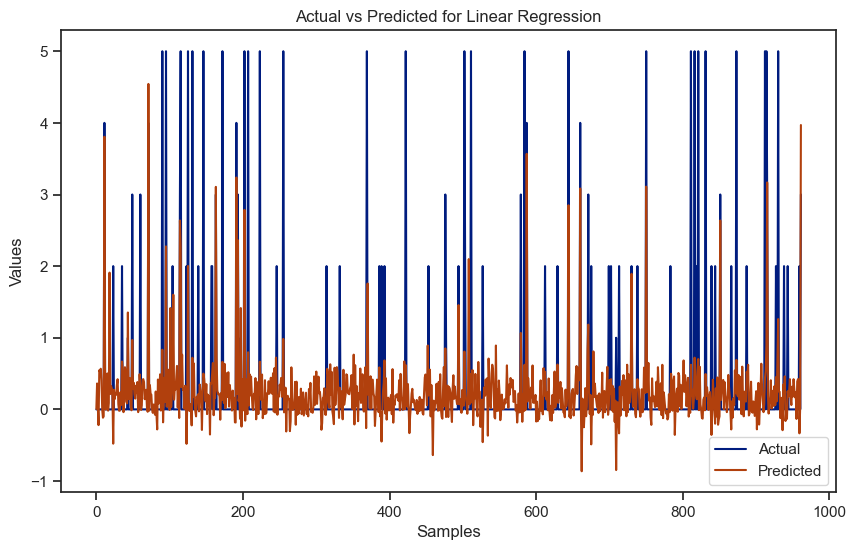

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression tidak memiliki hyperparameter yang umum untuk divariasikan seperti n_estimators pada Random Forest.
# Namun, untuk ilustrasi, kita bisa melihat performa dengan atau tanpa fitur tambahan.

# Menyiapkan data tambahan untuk ilustrasi
X_train_lr = X_train[['Berat', 'Tinggi', 'BB/U', 'TB/U']]
X_test_lr = X_test[['Berat', 'Tinggi', 'BB/U', 'TB/U']]

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)
y_pred_lr = model_lr.predict(X_test_lr)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean Squared Error (MSE) for Linear Regression:", mse_lr)
print("R2 Score for Linear Regression:", r2_lr)

# Visualisasi hasil Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Actual vs Predicted for Linear Regression')
plt.legend()
plt.show()


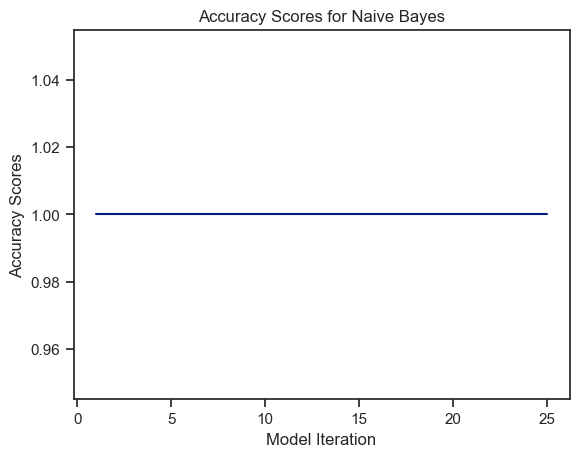

Accuracy Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Highest Accuracy: 1.0


In [175]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Menyiapkan range model
model_range = list(range(1, 26))
scores_nb = []

for _ in model_range:
    model_nb = GaussianNB()
    model_nb.fit(X_train, y_train)
    y_pred_nb = model_nb.predict(X_test)
    
    # Evaluasi Naive Bayes
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    scores_nb.append(accuracy_nb)

plt.plot(model_range, scores_nb)
plt.xlabel('Model Iteration')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Naive Bayes')
plt.show()

print('Accuracy Scores:', scores_nb)
print('Highest Accuracy:', max(scores_nb))


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8230 - loss: 1.0746
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9324 - loss: 0.2347
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1695
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9577 - loss: 0.1344
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.0910
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9179 - loss: 0.5272
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9301 - loss: 0.2512
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9516 - loss: 0.1673
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9708 - loss: 0.1026
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.0956
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9208 - loss: 0.5124
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9252 - loss: 0.2747
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.2062
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9476 - loss: 0.1512
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.1378
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8503 - loss: 0.9372
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9393 - loss: 0.2368
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9442 - loss: 0.1812
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9496 - loss: 0.1564
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1022
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9185 - loss: 0.5186
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9289 - loss: 0.2482
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.1872
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1496
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.1107
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7992 - loss: 2.0181
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9396 - loss: 0.2303
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9483 - loss: 0.1845
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9629 - loss: 0.1317
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9736 - loss: 0.0998
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8128 - loss: 0.9333
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.2274
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9504 - loss: 0.1756
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.1247
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.1036
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8816 - loss: 1.0246
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9387 - loss: 0.2474
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9483 - loss: 0.1838
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9570 - loss: 0.1457
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.1066
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7684 - loss: 2.4718
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 0.2752
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9392 - loss: 0.2043
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1511
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.1119
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8559 - loss: 0.6089
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.2324
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1318
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.1152
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0727
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7094 - loss: 4.0333
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.2366
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.1625
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1164
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9721 - loss: 0.0952
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6979 - loss: 4.6385
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9145 - loss: 0.3118
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 0.2120
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9438 - loss: 0.1803
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.1419
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7692 - loss: 1.7895
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 - loss: 0.2442
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9432 - loss: 0.1702
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9677 - loss: 0.1102
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9743 - loss: 0.0898
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7707 - loss: 2.6846
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9245 - loss: 0.2777
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.1813
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9572 - loss: 0.1491
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.1146
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9173 - loss: 0.5220
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9416 - loss: 0.2088
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.1410
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9686 - loss: 0.1133
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9765 - loss: 0.0880
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8185 - loss: 1.2323
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9236 - loss: 0.2655
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9465 - loss: 0.1869
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9576 - loss: 0.1381
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.1187
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7406 - loss: 2.3967
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9264 - loss: 0.2842
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9437 - loss: 0.1910
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9497 - loss: 0.1574
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9683 - loss: 0.1186
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6803 - loss: 5.0614
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9258 - loss: 0.3413
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9268 - loss: 0.2562
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1711
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9561 - loss: 0.1357
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6633 - loss: 5.2214
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9186 - loss: 0.3001
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9421 - loss: 0.1831
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9456 - loss: 0.1817
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9568 - loss: 0.1397
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8173 - loss: 1.2683
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9267 - loss: 0.2570
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9385 - loss: 0.2010
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9592 - loss: 0.1442
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9608 - loss: 0.1285
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8216 - loss: 1.4595
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9361 - loss: 0.2274
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9526 - loss: 0.1607
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.1252
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9708 - loss: 0.0990
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6584 - loss: 4.8194
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9250 - loss: 0.3462
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9376 - loss: 0.2308
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9485 - loss: 0.1710
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1294
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6985 - loss: 2.9152
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9230 - loss: 0.3128
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9294 - loss: 0.2252
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.1477
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1096
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7937 - loss: 2.0023
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.3641
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9226 - loss: 0.2709
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.2087
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9561 - loss: 0.1754
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6631 - loss: 3.6693
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9231 - loss: 0.3265
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9339 - loss: 0.2352
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9519 - loss: 0.1879
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9595 - loss: 0.1355
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


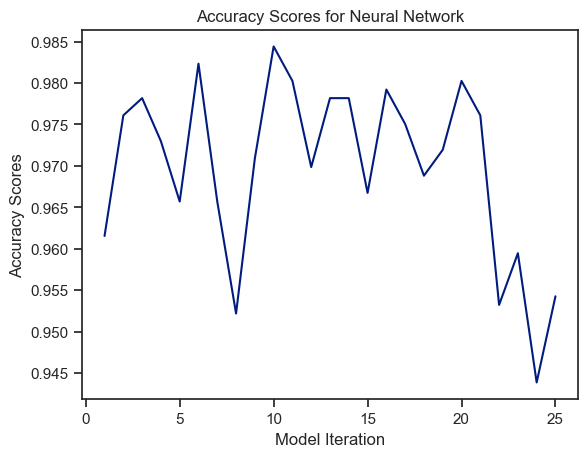

Accuracy Scores: [0.9615384615384616, 0.9760914760914761, 0.9781704781704782, 0.972972972972973, 0.9656964656964657, 0.9823284823284824, 0.9656964656964657, 0.9521829521829522, 0.9708939708939709, 0.9844074844074844, 0.9802494802494802, 0.9698544698544699, 0.9781704781704782, 0.9781704781704782, 0.9667359667359667, 0.9792099792099792, 0.975051975051975, 0.9688149688149689, 0.9719334719334719, 0.9802494802494802, 0.9760914760914761, 0.9532224532224532, 0.9594594594594594, 0.9438669438669439, 0.9542619542619543]
Highest Accuracy: 0.9844074844074844


In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Konversi target ke one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Menyiapkan range model
model_range = list(range(1, 26))
scores_nn = []

for _ in model_range:
    # Training Neural Network
    model_nn = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(y_train_categorical.shape[1], activation='softmax')
    ])

    model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_nn.fit(X_train, y_train_categorical, epochs=5, batch_size=32, verbose=1)
    
    # Prediksi dengan Neural Network
    y_pred_nn = model_nn.predict(X_test)
    y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)
    
    # Evaluasi Neural Network
    accuracy_nn = accuracy_score(y_test, y_pred_nn_classes)
    scores_nn.append(accuracy_nn)

plt.plot(model_range, scores_nn)
plt.xlabel('Model Iteration')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores for Neural Network')
plt.show()

print('Accuracy Scores:', scores_nn)
print('Highest Accuracy:', max(scores_nn))


In [177]:
import pickle

In [178]:
import pickle

# Simpan model Linear Regression
filename_lr = 'model_lr.sav'
pickle.dump(model_lr, open(filename_lr, 'wb'))

# Simpan model Naive Bayes
filename_nb = 'model_nb.sav'
pickle.dump(model_nb, open(filename_nb, 'wb'))

# Simpan model Neural Network
filename_nn = 'model_nn.sav'
pickle.dump(model_nn, open(filename_nn, 'wb'))




In [179]:
with open('scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

In [181]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
encoder_bb_u = LabelEncoder().fit(feature['BB/U'])
encoder_tb_u = LabelEncoder().fit(feature['TB/U'])
encoder_jk = LabelEncoder().fit(feature['JK'])
encoder_bb_tb = LabelEncoder().fit(feature['BB/TB'])

# Simpan encoder menggunakan pickle
with open('encoder_bb_u.pkl', 'wb') as file:
    pickle.dump(encoder_bb_u, file)
with open('encoder_tb_u.pkl', 'wb') as file:
    pickle.dump(encoder_tb_u, file)
with open('encoder_jk.pkl', 'wb') as file:
    pickle.dump(encoder_jk, file)
with open('encoder_bb_tb.pkl', 'wb') as file:
    pickle.dump(encoder_bb_tb, file)


In [183]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Misalkan 'encoder_bb_u' adalah LabelEncoder yang telah Anda buat
encoder_bb_u = LabelEncoder()
# Latih encoder jika belum dilatih
encoder_bb_u.fit(feature)

# Simpan encoder ke file
with open('encoder_bb_u.sav', 'wb') as file:
    pickle.dump(encoder_bb_u, file)


ValueError: y should be a 1d array, got an array of shape (4808, 6) instead.